In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.stats import pearsonr
import statsmodels.api as sm

/home/lukeum/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Density')

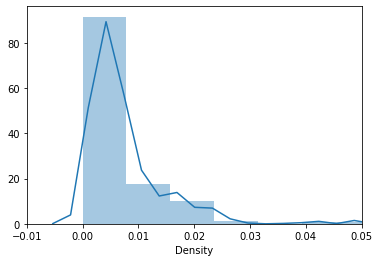

In [6]:
# plot density distributions
graph_path = './summaries/graph'
subreddits = os.listdir(graph_path)
time = '2018_01'

densities = {}
for sub in subreddits:
    try:
        data = pd.read_csv(os.path.join(graph_path,sub,sub),index_col=0)
        densities[sub] = data.loc[time]['density']
    except:
        continue

sns.distplot(list(densities.values()))
plt.xlim(-0.01,0.05)
plt.xlabel('Density')

In [18]:
word_path = './summaries/variants/'
graph_path = './summaries/graph'


subreddits = os.listdir(word_path)
time = time = '2017_01'

var = []
den = []
users = []
for sub in tqdm(subreddits):
    try:
        lexical = pd.read_csv(os.path.join(word_path,sub),index_col=0)
        xsection = lexical.loc[time]
        xsection = xsection[xsection>10]
        count = len(xsection)


        data = pd.read_csv(os.path.join(graph_path,'subreddit-'+sub,'subreddit-'+sub),index_col=0)    
        density = data.loc[time]['density']
        num_node = data.loc[time]['nodes']

        assert density != 0
        var.append(count)
        den.append(density)
        users.append(num_node)
    except:
        continue

var = np.array(var)
den = np.array(den)
users = np.array(users)

100%|██████████| 196/196 [00:43<00:00,  4.52it/s]


(-0.3429129743916085, 2.978607204315752e-06)


Text(0, 0.5, 'num of slangs')

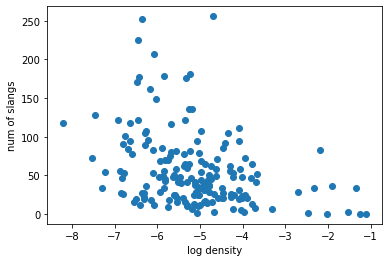

In [19]:
plt.scatter(np.log(den),var)
print(pearsonr(np.log(den),var))

plt.xlabel("log density")
plt.ylabel("num of slangs")

(0.6040668968794422, 5.538847177732899e-19)


Text(0, 0.5, 'num of slangs')

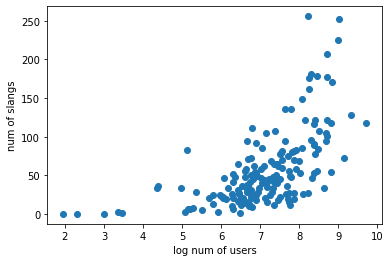

In [20]:
plt.scatter(np.log(users),var)    
print(pearsonr(np.log(users),var))

plt.xlabel("log num of users")
plt.ylabel("num of slangs")

(-0.9175938082319419, 5.062690591769764e-72)


Text(0, 0.5, 'log density')

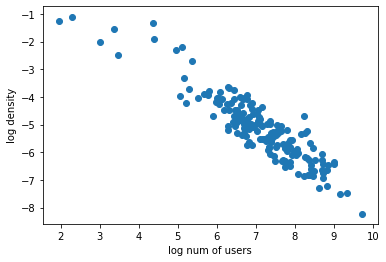

In [21]:
plt.scatter(np.log(users),np.log(den))
print(pearsonr(np.log(users),np.log(den)))    

plt.xlabel("log num of users")
plt.ylabel("log density")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.065
Method:                 Least Squares   F-statistic:                              13.32
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                    0.000346
Time:                        13:49:44   Log-Likelihood:                         -204.52
No. Observations:                 177   AIC:                                      411.0
Df Residuals:                     176   BIC:                                      414.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(0.26523548059804886, 0.00035992929183190656)

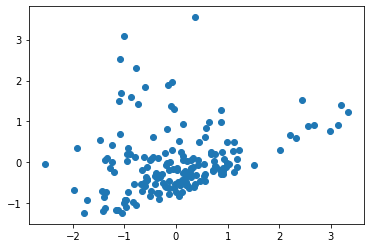

In [23]:
norm_var = (var-np.mean(var))/np.std(var)
norm_users = (np.log(users)-np.mean(np.log(users)))/np.std(np.log(users))
model = sm.OLS(norm_var,norm_users).fit()
pred = model.predict()

res = norm_var - pred
norm_den = (np.log(den) - np.mean(np.log(den)))/np.std(np.log(den))
plt.scatter(norm_den,res)
residue = sm.OLS(res,norm_den).fit() 
print(residue.summary())
pearsonr(norm_den,res)

In [55]:
word_path = './summaries/variants/'
graph_path = './summaries/graph'

sub = 'webdev'
var = []
den = []
users = []

data = pd.read_csv(os.path.join(graph_path,'subreddit-'+sub,'subreddit-'+sub),index_col=0)
lexical = pd.read_csv(os.path.join(word_path,sub),index_col=0)

times = sorted(set(data.index.values).intersection(set(lexical.index.values)))
for t in tqdm(times):
    try:
        xsection = lexical.loc[t]
        xsection = xsection[xsection>10]
        count = len(xsection)

        density = data.loc[t]['density']
        num_node = data.loc[t]['nodes']

        assert density != 0
        var.append(count)
        den.append(density)
        users.append(num_node)
    except:
        continue

var = np.array(var)
den = np.array(den)
users = np.array(users)

100%|██████████| 118/118 [00:00<00:00, 1844.52it/s]


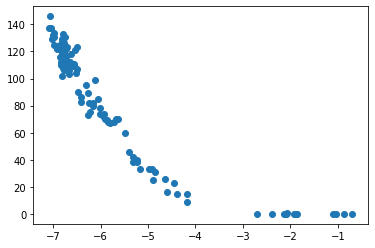

In [56]:
plt.scatter(np.log(den),var)

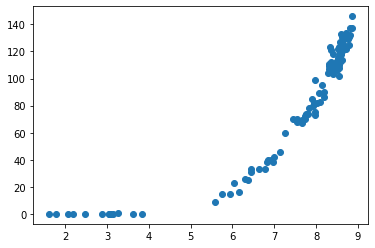

In [57]:
plt.scatter(np.log(users),var)

(0, 0.01)

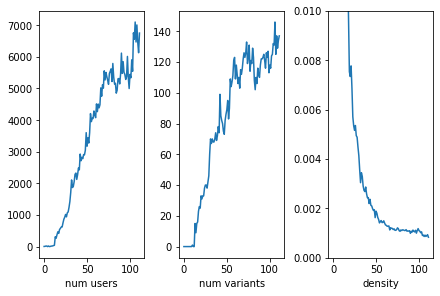

In [59]:
fig, ax = plt.subplots(1,3,constrained_layout=True)
ax[0].plot(users)
ax[0].set_xlabel('num users')
ax[1].plot(var)
ax[1].set_xlabel('num variants')
ax[2].plot(den)
ax[2].set_xlabel('density')
ax[2].set_ylim(0,0.01)